In [9]:
import pandas as pd
import sys
sys.path.append("../../2022-INFORMS-DEMO")
from solver import data as d, model as m
from importlib import reload

### Load the data set from Excel

In [3]:
data_file = '../data/data.xlsx'

tasks = pd.read_excel(data_file, 'Tasks', index_col=0)
resources = pd.read_excel(data_file, 'Resources', index_col=0)
tasks_for_resource = pd.read_excel(data_file, 'Tasks For Resources', index_col=[0, 1])

### Load the raw data object with the pandas data we loaded from the data set

In [4]:
raw_data = d.RawData(tasks, resources, tasks_for_resource)

#### Validate the raw data

In [5]:
raw_data.validate()

(True, [])

### Transform the raw data into the model data

In [6]:
model_data = raw_data.transform_to_model_data()

### Create Model Object and Solve

In [11]:
reload(m)
model = m.DemoModel(model_data)
solution = model.build_and_solve()
solution.assignments

Building constraints for the demo model.
	Building constraints for setting max work hours for resources.
		Added 6 max hours for resource constraints.
	Building constraints for limiting tasks to only be assigned to one resource.
		Added 10 tasks assigned to a single resource constraints.
Finished building constraints for demo model.
Adding a minimize cost objective function to the model.
Solving Model...
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[arm])
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads
Optimize a model with 16 rows, 38 columns and 76 nonzeros
Model fingerprint: 0xe28d5ebd
Variable types: 0 continuous, 38 integer (38 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+00]
  Objective range  [3e+01, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]
Found heuristic solution: objective 817.0000000
Presolve removed 6 rows and 20 columns
Presolve time: 0.00s
Presolved: 10 rows, 18 columns, 36 nonzeros


IsAssigned
Resource Task           
A        1           1.0
         2           1.0
B        10          1.0
C        8           1.0
D        5           1.0
         9           1.0
E        3           1.0
F        4           1.0
         6           1.0
         7           1.0

In [7]:
assignment_data = solution.assignments.copy()
assignment_data = assignment_data.merge(model_data.tasks[['Time']], how='left', left_on='Task',right_index=True)
assignment_data

IsAssigned  Time
Resource Task                 
A        4             1     4
         8             1     4
B        1             1     5
C        10            1     5
D        5             1     2
         9             1     5
E        2             1     3
F        3             1     4
         6             1     4
         7             1     2

In [8]:
import plotly.graph_objects as go

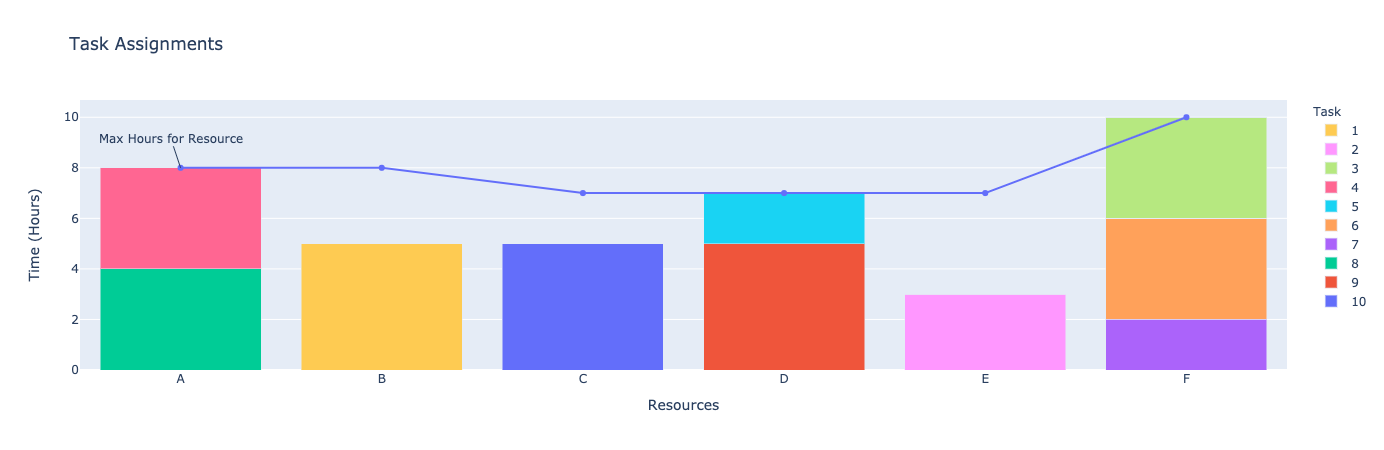

In [16]:
fig = go.Figure()
res = list(assignment_data.index.get_level_values("Resource").unique())

for it in assignment_data.reset_index().sort_values('Task', ascending=False).itertuples():
    y_dict = {r:0 for r in res}
    y_dict[it.Resource] = it.Time
    fig.add_trace(go.Bar(x=res, y=list(y_dict.values()), name=it.Task))

    
fig.add_trace(go.Scatter(x=res, y=model_data.resources.AvailableTime.values, name='Max Hours', showlegend=False))
fig.update_layout(barmode='stack', title='Task Assignments', xaxis={'title':"Resources"}, legend={'title':"Task"}, yaxis={'title': "Time (Hours)"}, width=800, autosize=False)
fig.add_annotation(
            x='A',
            y=assignment_data.query('Resource=="A"').Time.sum(),
            text="Max Hours for Resource")
fig

In [10]:
tasks.Time.sum()

38

In [11]:
resources.AvailableTime.sum()

47